In [1]:
import numpy as np 
import seaborn as sns
import cv2

In [2]:
import sys
sys.path.append('E:\\LogisticRegression\\Shared\\Shared_ReadData')
print(sys.path)

['e:\\LogisticRegression\\DogBreedClassification', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\python311.zip', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\DLLs', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311', '', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\win32\\lib', 'C:\\Users\\admin\\AppData\\Roaming\\Python\\Python311\\site-packages\\Pythonwin', 'c:\\Users\\admin\\AppData\\Local\\Programs\\Python\\Python311\\Lib\\site-packages', 'E:\\LogisticRegression\\Shared\\Shared_ReadData']


In [3]:
import Shared_Implementation_ReadData as simr

In [4]:
base_path = 'E:/MachineLearning/LogisticRegression/DogBreedClassification/dataset/'
breed_folder = ['German_Shepherd', 'Golden_Retriever']
img = simr.ReadData()

In [5]:
german_shepherd_img = []
golden_retriever_img = []

In [6]:
for folder in breed_folder:
    img_collection = img.read_image(base_path, folder)
    if folder == "German_Shepherd":
        german_shepherd_img.extend(img_collection)
    if folder == "Golden_Retriever":
        golden_retriever_img.extend(img_collection)

# print("Number of images in German_Shepherd:", len(german_shepherd_img))
# print("Number of images in Golden_Retriever:", len(golden_retriever_img))  

In [7]:
X = [] 
y = []

In [8]:
sys.path.append('E:\\LogisticRegression\\Shared')

In [9]:
import Shared_AttachLabel as sa

In [10]:
# attach label to:
# German_Shepherd = 0
# Golden_Retriever = 1
sa.attach_label(german_shepherd_img, "German_Shepherd", X, y)
sa.attach_label(golden_retriever_img, "Golden_Retriever", X, y)

In [11]:
sys.path.append('E:\\LogisticRegression\\Shared\\Shared_Model')

In [12]:
from Shared_Implementation_Model import logisticRegression

In [13]:
model = logisticRegression()
model.build_model(X, y)
prediction = model.predict(model.X_test)
print(prediction)

[1 0 1 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1 1 1 1 0 0 1 1 0 0 0 1
 1 1 0 1 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1 0]


In [14]:
print(model.classificationReport())

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        28
           1       1.00      1.00      1.00        29

    accuracy                           1.00        57
   macro avg       1.00      1.00      1.00        57
weighted avg       1.00      1.00      1.00        57



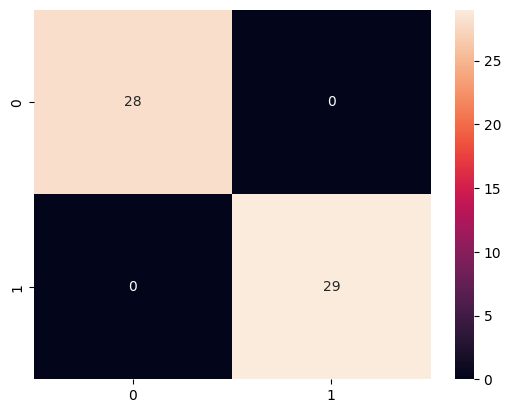

In [15]:
model.heat_map()

In [16]:
path = 'E:/LogisticRegression/DogBreedClassification/test/german_shephed/test_german_shepherd_2.jpg'
test_img = [cv2.resize(img.read_image(path, ''), (140, 140)).flatten()]
model.predict(test_img)

array([0])